## Testing different fibre composites

Fabrication methods were the same - a board covered in saran wrap, 3 layers (except the Emmakites 40D Ripstop Nylon which was also tested at 6 layers) of material and epoxy, breather fabric, breather film, all vacuum bagged.

Sample data S15 and S19 were retested as S27 and S28. In addition, S14, S20 and S28 only contain 1 data point, it's thought that the process with which S15 and S19 were halted may have impacted the subsequent/prior tests. Furthermore, the Emmakites data samples seem to be incomplete, judging by the number of data points in each file.

In [82]:
import numpy as np
import csv
from matplotlib import pyplot as plt

cols = ['#cc33ff', '#33cc33', '#6666ff', '#ff0066', '#00cc99', '#0066ff', '#ff0000', '#003399', '#ffcc00', '#990033', '#ff9933', '#cc99ff', '#33cccc']

# sample_no, mass (g), length (mm), width (mm), height (mm), instron data
data = [[1.1, 5.3, 112.1, 35.13, 1.55, 1, 'Medium Weight Linen White'],
             [1.2, 4.4, 112.46, 34.64, 0.94,2, 'Medium Weight Linen White'],
             [2.1, 5.7, 112.0, 34.44, 1.35, 3, 'Kaufman Brussels Washer Linen Blend Yarn Dye Flax'],
             [2.2, 5.6, 111.25, 33.65, 1.22, 4, 'Kaufman Brussels Washer Linen Blend Yarn Dye Flax'],
             [3.1, 6.1, 111.31, 34.05, 1.46, 5, 'Kaufman Essex Linen Blend Natural Fabric'],
             [3.2, 6.2, 111.89, 33.95, 1.45, 6, 'Kaufman Essex Linen Blend Natural Fabric'],
             [4.1, 9.0, 111.68, 34.17, 2.13, 7, '9.3 oz. Canvas Duck Natural'],
             [4.2, 8.9, 111.44, 33.72, 1.96, 8, '9.3 oz. Canvas Duck Natural'],
             [5.1, 6.2, 111.62, 34.61, 1.37, 9, 'European 100% Linen Stone Fabric'],
             [5.2, 7.7, 112.2, 34.39, 2.21, 10, 'European 100% Linen Stone Fabric'],
             [6.1, 2.8, 110.98, 33.53, 0.8, 11, 'Emmakites 40D Ripstop Nylon - 3 layers'],
             [6.2, 3.0, 112.08, 33.73, 0.95, 12, 'Emmakites 40D Ripstop Nylon - 3 layers'],
             [6.3, 2.9, 112.81, 33.02, 0.94, 13, 'Emmakites 40D Ripstop Nylon - 6 layers'],
             #[6.4, 2.6, 108.35, 35.00, 0.89, 14, 'Emmakites 40D Ripstop Nylon - 6 layers'],
             [7.1, 8.0, 110.92, 33.68, 1.82, 27, 'Organic Cotton Ripstop Natural'],
             [7.2, 8.0, 112.63, 34.14, 2.07, 16, 'Organic Cotton Ripstop Natural'],
             [8.1, 5.4, 110.41, 33.62, 1.18, 17, 'Natural Linen Fabric, Zakka Cotton/linen, Organic Unbleached'],
             [8.2, 5.4, 112.39, 33.97, 1.21, 18, 'Natural Linen Fabric, Zakka Cotton/linen, Organic Unbleached'],
             #[9.1, 1.7, 113.86, 33.01, 0.49, 28, 'Black 70 Denier Nylon Ripstop'],
             #[9.2, 1.6, 113.35, 32.87, 0.63, 20, 'Black 70 Denier Nylon Ripstop'],
             [10.1, 5.9, 112.14, 33.59, 1.36, 21, 'Natural Irish Linen Fabric'],
             [10.2, 6.0, 111.62, 34.15, 1.48, 22, 'Natural Irish Linen Fabric'],
             [11.1, 5.4, 110.39, 34.04, 1.32, 23, 'European 100% Linen Oatmeal Fabric'],
             [11.2, 5.7, 111.80, 35.13, 1.24, 24, 'European 100% Linen Oatmeal Fabric'],
             [12.1, 9.6, 112.23, 33.99, 2.14, 25, '10-Ounces Natural Canvas'],
             [12.2, 9.2, 112.88, 34.13, 2.21, 26, '10-Ounces Natural Canvas']]
SN = 0; M = 1; L = 2; W = 3; H = 4; ID = 5; MT = 6;
data = np.array(data)
sample_number = np.array(data[:,SN])
length = np.array(data[:,L], dtype=np.float64)
width = np.array(data[:,W], dtype=np.float64)
height = np.array(data[:,H], dtype=np.float64)
mass = np.array(data[:,M], dtype=np.float64)
material_type = np.array(data[:,MT])
volume = np.dot(length, np.dot(width, height)) # in mm^3
density = np.divide(mass,volume)*1000000 # in kg/m^3

float_data = np.column_stack((np.column_stack((np.column_stack((mass,length)),width)),height))


In [83]:
# takes the instron csv files and makes numpy arrays of the data for each sample
# note - S15 and S19 were retested as S27 and S28

# make the string for the csv file of each sample

all_instron_data = []
file_name = "instron_data_2017.05.10/Specimen_RawData_" + str(1) + ".csv"
T = 0; D = 1; F = 2;

# extract the row from the csv file and then pull out the numbers

for h in range(len(data)):
    file_name = "instron_data_2017.05.10/Specimen_RawData_" + str(int(data[h][ID])) + ".csv"
    with open(file_name, 'rb') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        instron_data_np = []
        instron_data_str = []
        for row in csvreader:
            r =  ', '.join(row)
            instron_data_str.append(r)
    
    for i in range(2,len(instron_data_str)):
        extract = np.fromstring(instron_data_str[i], dtype=float, sep=',')
        instron_data_np.append(extract)
            
    all_instron_data.append(instron_data_np)

all_instron_data = np.array(all_instron_data)
print np.shape(all_instron_data)
       

(23,)


(23,)
Sample 1 has 961 data points
Sample 2 has 875 data points
Sample 3 has 940 data points
Sample 4 has 921 data points
Sample 5 has 966 data points
Sample 6 has 965 data points
Sample 7 has 1072 data points
Sample 8 has 1067 data points
Sample 9 has 1003 data points
Sample 10 has 1060 data points
Sample 11 has 532 data points
Sample 12 has 308 data points
Sample 13 has 245 data points
Sample 27 has 1079 data points
Sample 16 has 1016 data points
Sample 17 has 935 data points
Sample 18 has 943 data points
Sample 21 has 950 data points
Sample 22 has 953 data points
Sample 23 has 905 data points
Sample 24 has 968 data points
Sample 25 has 1098 data points
Sample 26 has 1058 data points


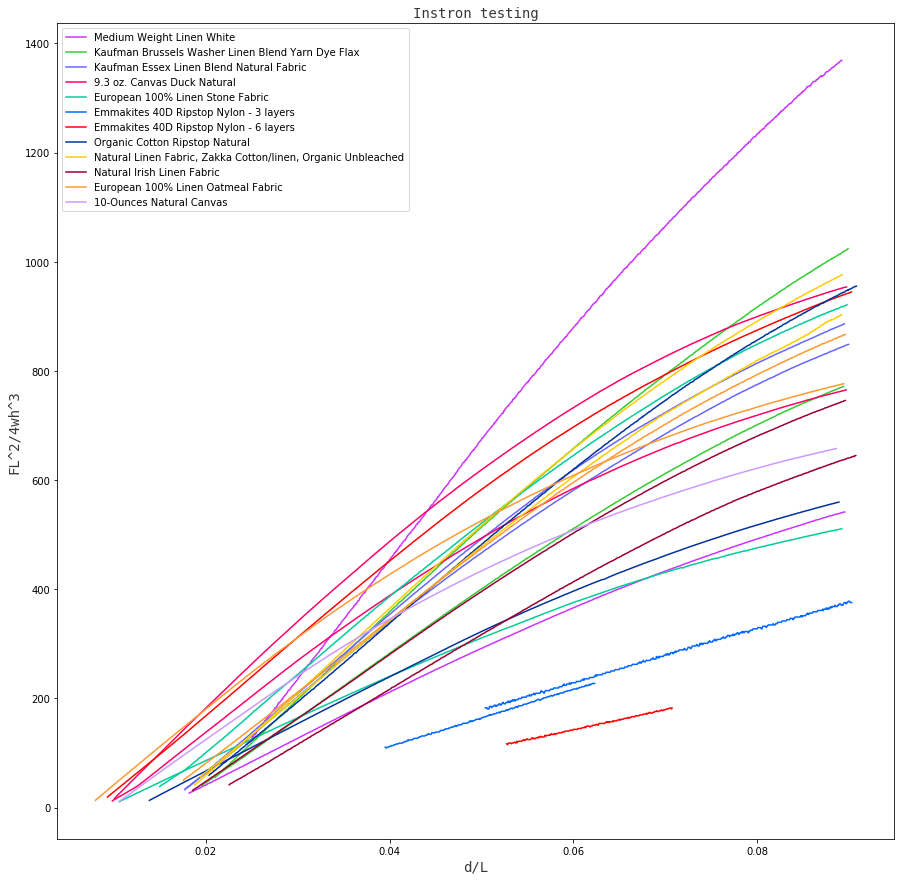

In [84]:
def prepare_data_to_plot(dims,instron_data):
    data_to_plot = []
    print(np.shape(instron_data))
    for i in range(len(dims)):
        test_data = instron_data[i]
        specimen_data = dims[i]
        
        l = specimen_data[1]
        w = specimen_data[2]
        h = specimen_data[3]
        test_data = np.array(test_data)
        deflection = test_data[:,D]
        load = test_data[:,F]

        
        # d/L for the x axis
        X = -1*deflection/l
        
        #(F L**2)/(4 w h**3) for y axis
        Y = load * (-l**2/(4*w*h**3))
        
        data_to_plot.append([X,Y])
    return data_to_plot
    

def plot_instron_data(d):
    t1 = "Instron testing"
    font = {'family': 'monospace',
        'color':  '#39393d',
        'weight': 'light',
        'size': 14,
        }
    fig = plt.figure(figsize=(15,15), facecolor="white")
    ax = fig.add_subplot(111)
    ax.set_title(t1, fontdict=font)
    ax.set_xlabel('d/L',fontdict=font)
    ax.set_ylabel('FL^2/4wh^3',fontdict=font)
    for j in range(len(d)):
        #print("Sample " + str(j+1) + " has " + str(len(d[j][0])) + " data points")
        print("Sample " + data[j][5] + " has " + str(len(d[j][0])) + " data points")
        
        if j%2==0:
            ax.plot(d[j][0],d[j][1],color=cols[j/2],label=material_type[j])
        else:
            ax.plot(d[j][0],d[j][1],color=cols[j/2])
    plt.legend()
    plt.show()

plot_data = prepare_data_to_plot(float_data,all_instron_data)
plot_instron_data(plot_data)

# specimen 11, 12 and 13 don't seem to have the full set of extensions?
# sampledata 20 and 28 only contains a single data point - maybe something has happened to the data since I last plotted?


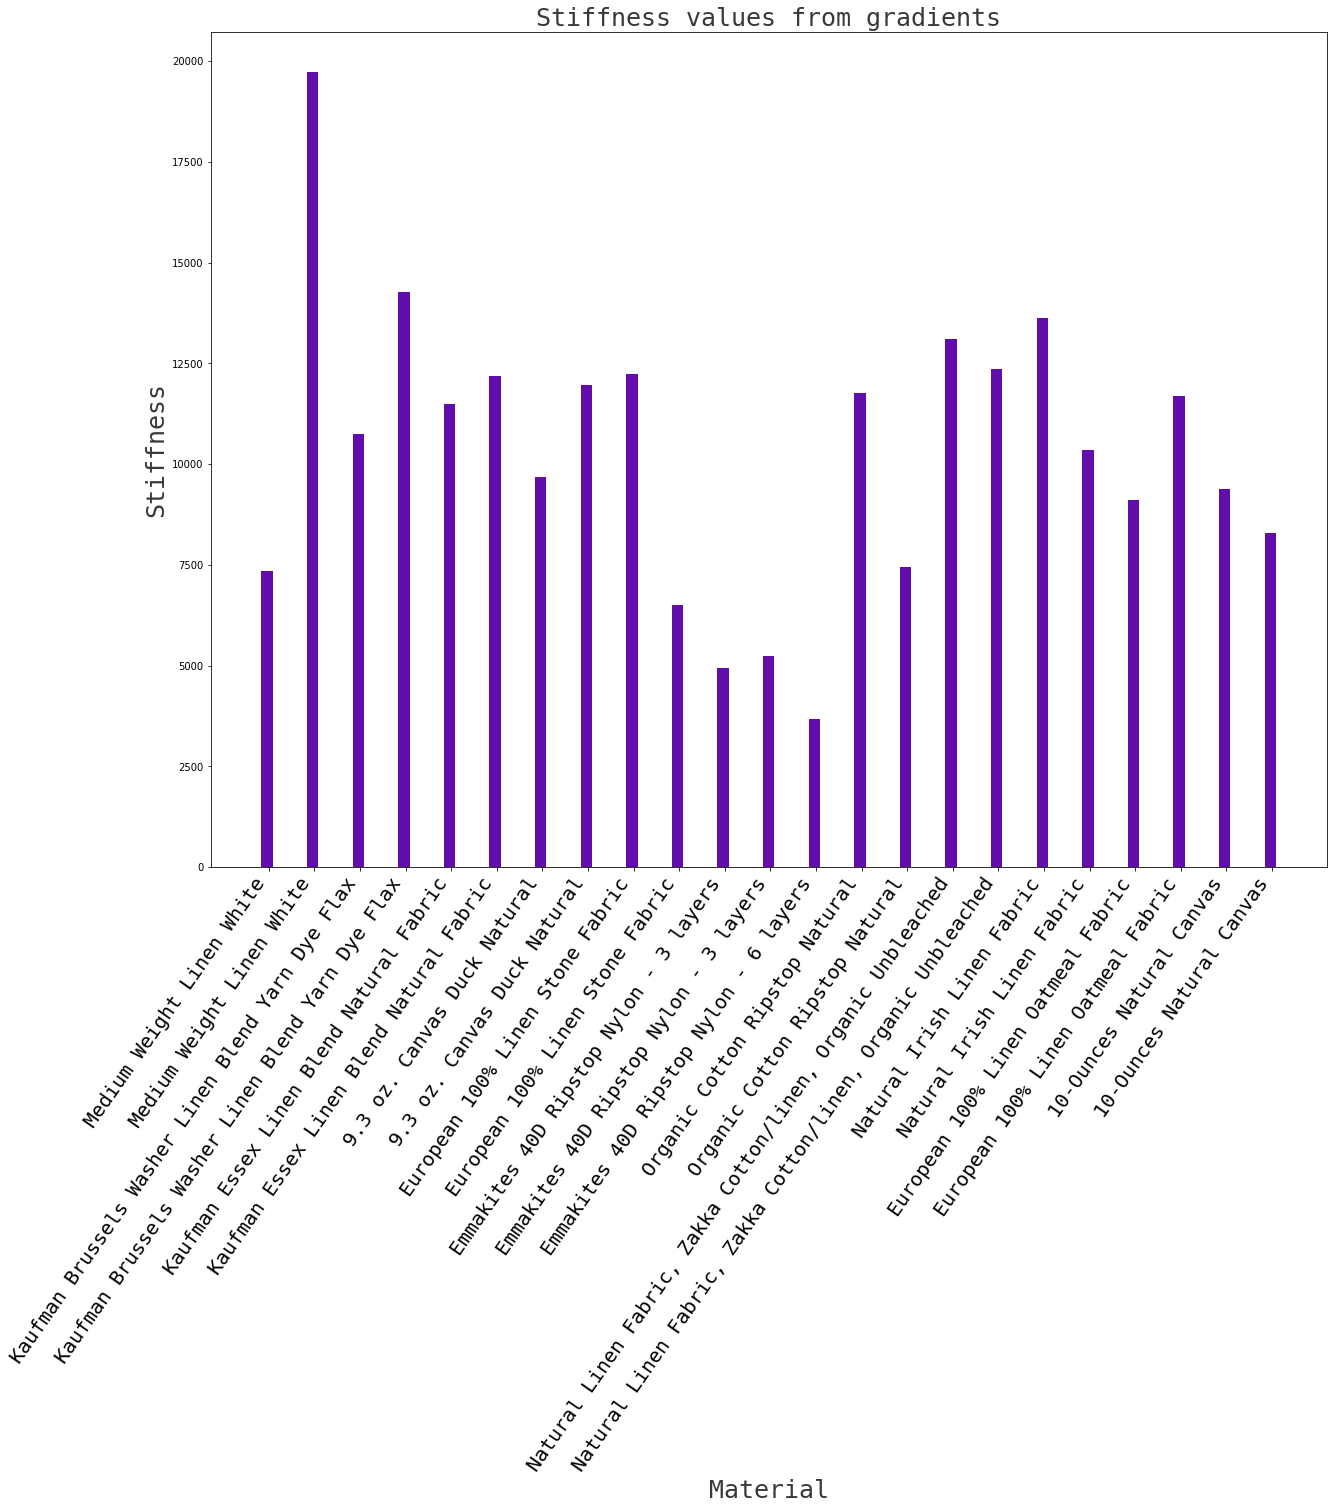

In [85]:
# calculate stiffness
def fit_function(x,y,n):
    N = n
    M = 2
    A = []
    x = np.array(x)
    A = np.dstack((np.ones(n),x))
    U,s,V = np.linalg.svd(A[0], full_matrices=True)
    V = V.T
    w_inv = np.array([1/wi if wi!=0 else 0 for wi in s])
    S = np.zeros((2,n)); S[:2,:2] = np.diag(w_inv)
    v = np.dot(V,np.dot(S,U.T))
    b = np.dot(v,y)
    return b

gradients = []
for y in range(len(plot_data)):
    gradients.append(fit_function(plot_data[y][0],plot_data[y][1],len(plot_data[y][1])))

gradients = np.array(gradients)
gradients_with_labels = []
for i in range(len(gradients)):
    gradients_with_labels.append([float(gradients[i][1]),data[i][MT]])
gradients_with_labels = np.array(gradients_with_labels)
gradients_sorted = np.sort(gradients_with_labels,axis=0)
gradients_sorted = np.array(gradients_sorted)

# only printing values with a positive gradient - doesn't seem to be sorting properly so 
# perhaps the floats aren't being maintained, so the sort method using a list doesn't work,
# I think I need to sort as a dictionary - could have been because some files only had 1 data point
# I've removed them for now

def calc_plot_stiffness():
    t1 = "Stiffness values from gradients"
    font = {'family': 'monospace',
        'color':  '#39393d',
        'weight': 'light',
        'size': 25,
        }
    fig = plt.figure(figsize=(20,20), facecolor="white")
    ax = fig.add_subplot(111)
    ax.set_title(t1, fontdict=font)
    ax.set_xlabel('Material',fontdict=font)
    ax.set_ylabel('Stiffness',fontdict=font)
    ind = np.arange(len(gradients_with_labels))
    width = 0.25 
    heights = []
    for i in range(len(gradients_with_labels)):
        heights.append(gradients_with_labels[i][0])
        #labels.append(gradients_with_labels[i][1])
    
    labels = gradients_with_labels[:,1]
    rects = ax.bar(ind, heights, width, height, color='#610dab',label=labels)
    plt.subplots_adjust(bottom=0.3)
    xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in rects]
    plt.xticks(xticks_pos, labels,  ha='right', rotation=55, fontsize=20,fontname='monospace')
    plt.show()
    
    # need to check whether the labels actually match the data on the graph
    
calc_plot_stiffness()
